### Intro

Human pose estimation는 2D 이미지인 2차원 좌표들을 찾아내거나  2D이미지에서 3차원 좌표를 찾는 것을 수행합니다.
즉, 복원의 개념이지요.

2차원에서 3차원으로 복원하는 것은 쉽지 않습니다. 왜냐하면, 카메라 행렬에서 x y z real world 좌표가 이미지 u v 좌표계로 표현될 때 z 축(거리 축) 정보가 소실되기 때문입니다.

그래서, 이번 블로그 에서는 2D영상 내 관절 위치 찾기를 이야기 해보도록 할 겁니다.

<br>

#### What is Pose?


2D Pose estimation은 사실 입출력 개수 차이만 있을 뿐 face landmark와 유사합니다.

그러나, 차이점은 face landmark는 고정된 상태가 대부분이지만 human pose같이 관절류들은 넓은 범위로 움직이는 자유도를 갖는 것입니다.

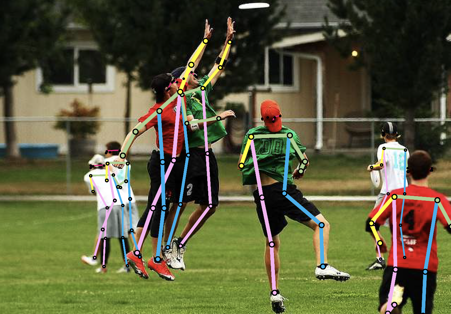

이 자유도라는 특징으로 인해 데이터 분포 설정에 난항을 겪게 됩니다. 그러면, 어떤 방식으로 이 난항을 극복해야할까요?

<br>

#### Methods

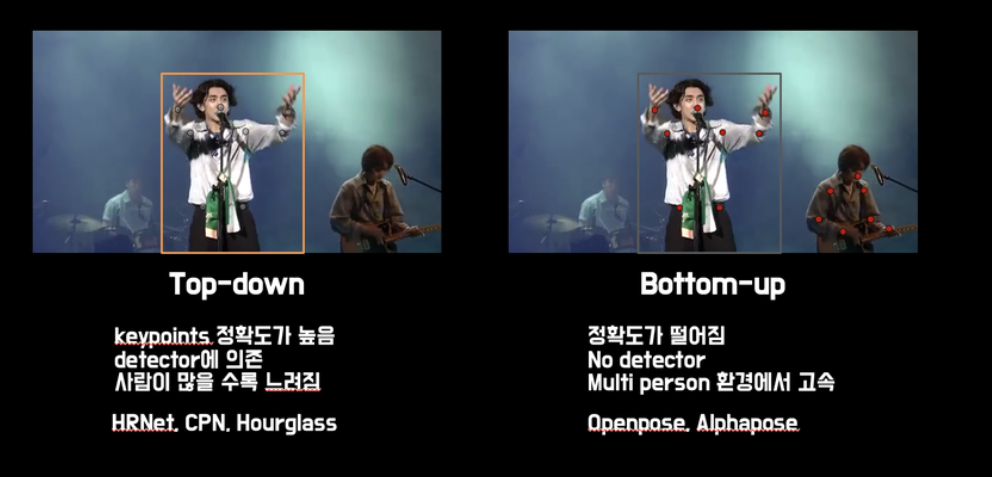

**Top-down**

- object detection을 통해 사람의 정확한 keypoint찾기

- crop한 이미지 내에서 keypoint 찾아내기

- detector이 선행

- 모든 사람마다 알고리즘 적용으로 인해 속도 저하


<br>

**Bottom-up**

- detector이 없고 keypoint부터 검출

- 한 사람에 해당하는 keypoint를 clustering함

- detector이 없으므로 다수의 사람 등장해도 속도 저하 X

- keypoint 검출 범위가 넓어서 성능이 떨어짐

<br>

### Human keypoint - detection-

#### 자유도가 높은 사람 동작

아래의 이미지처럼, 정말 다양하게 움직이죠? 어떻게 하면 이러한 위치 정보를 잘 따라가게 하는지 알려드리겠습니다.


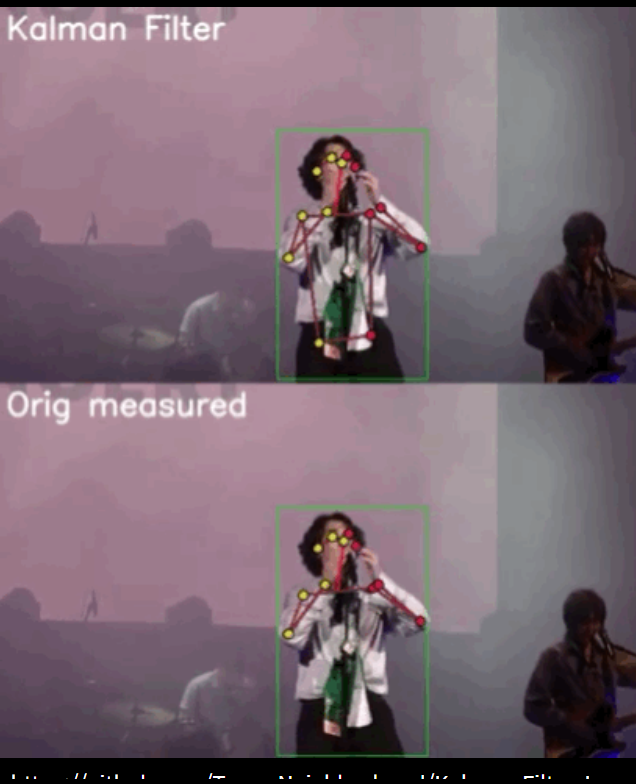

<br>

#### Pose estimation

*변천과정

초기, 모델의 x,y좌표를 직접적으로 예측하는 position regression문제로 인식을 했고 human detection을 통해 crop된 사람 이미지를 이용해서 모델 입력 후 좌표를 출력하는 방식입니다.

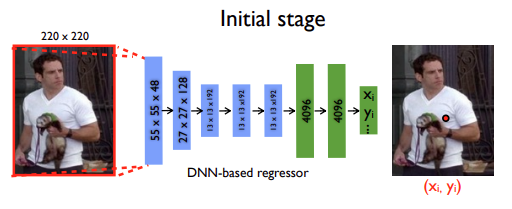

<br>


Deformable parts model 논문에선 graphical tree model은 같은 이미지 두 번 연산하여 연산 효율이 떨어지고 성능이 부족한 단점이 있었습니다.

<br>

AlexNet이후 CNN이 다양한 분야에 적용이 되어 Toshev and Szegedy가 딥러닝 기반 keypoint localization모델을 제안하게 됩니다.

그로 인해, 동작의 다양성 과 invisible join문제를 언급하여 딥러닝 기반 추론 방법이 해결책이 됨을 증명했습니다.

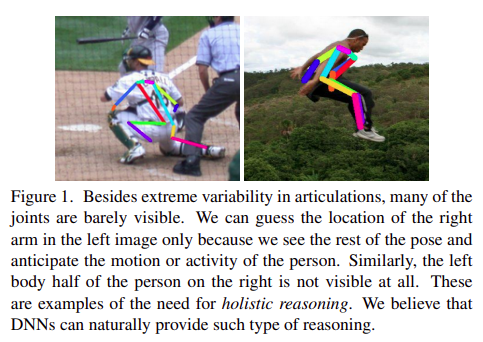

<br>

**DeepPose**

이 방식은 혁신적이긴 했으나 엄청난 성능 개선을 보이진 않았습니다. 그러나, SOTA에 가까운 성능을 내면서 딥러닝을 적용한 사례입니다.

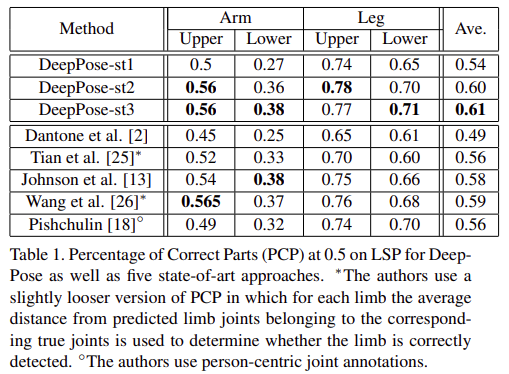


**Efficient object Localization Using Convolutional Network**

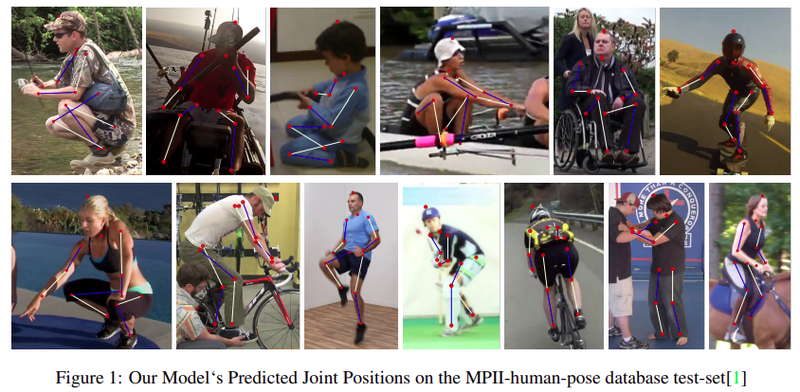

이 논문에선, DeepPose의 성능 개선이 잘 안되었던 이유에 대해서 이야기 하고 있다고 생각합니다.


<br>

논문에서 제안환 모델은 DeepPose보다 깊고 keypoint가 존재할 확률 분포를 학습하게 했습니다.

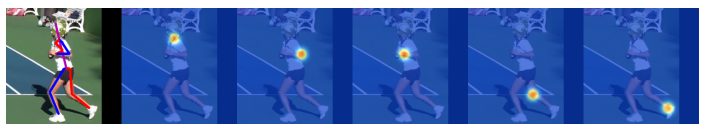

<br>

이 방식이 왜 좋은 성능을 보였을까요?

그것은, human pose(keypoint)이 항상 같은 위치의 점이 찍힐가요? 당연히 아래의 그림처럼 그렇지 않습니다.

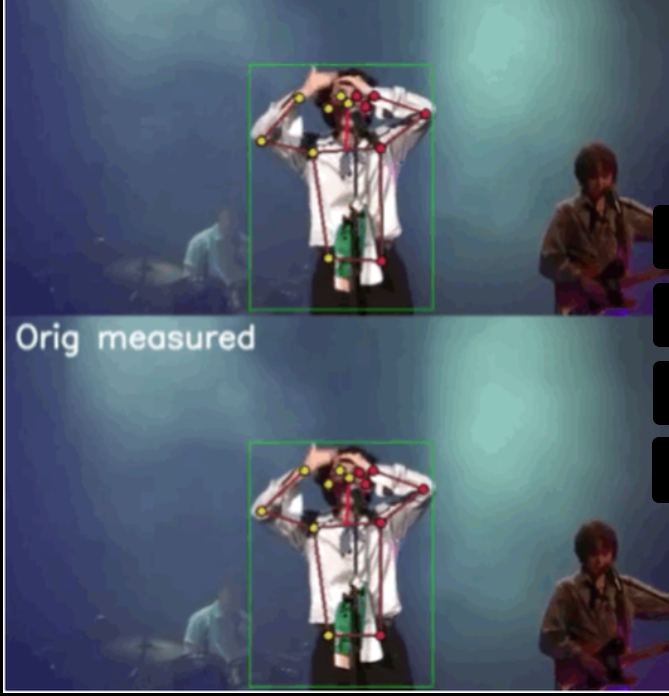

<br>

그래서, 같은 위차라고 생각하여 keypoint를 선택해도 사진마다 수 픽셀싹 차이가 생기고 있고 에러까지 더해져서 저장이 되는 거지요.

그러므로 저자는 이러한 점을 고려하여 label을 (x,y)좌표에서 (x,y)를 중심으로하는 heatmap으로 변환을 한 후 모
델 학습이 진행이 됩니다.

*제안한 모델

- coarse model 

   - 32 x 32 heatmap 추출
   
   - multi resolution 입력
   
   - coarse heatmap기준으로 crop
   

- fine model

   - refinement 수행


- 두 모델

   - 같은 weight 공유
   
   - 학습이 빠름
   
   - 메모리 저장공간 효율적 사용


*결과

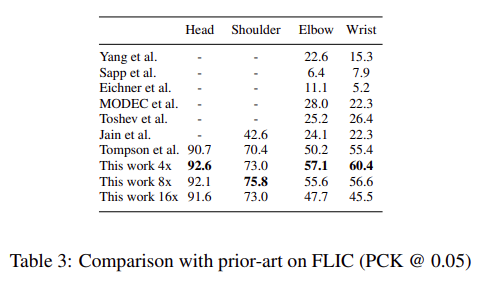

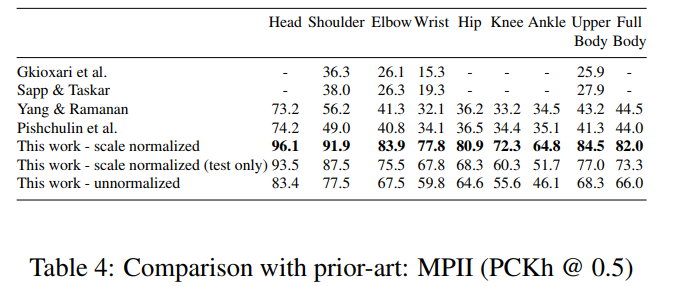




### Human keypoint detection

#### Convolutional Pose Machines(CPM)

- CVPR2016

- multi-stage 구조(completely differentiable)

- end to end

   - Stage 1: image feature 계산 역할
   
   - Stage 2: keypoint예측 역할
   
   - g1, g2 heatmap출력하여 재사용 가능 부분
   
   - weight sharing가능
   
   
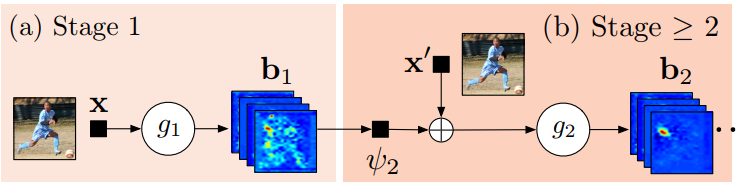

<br>

아래 그림에 대해 설명하겠습니다

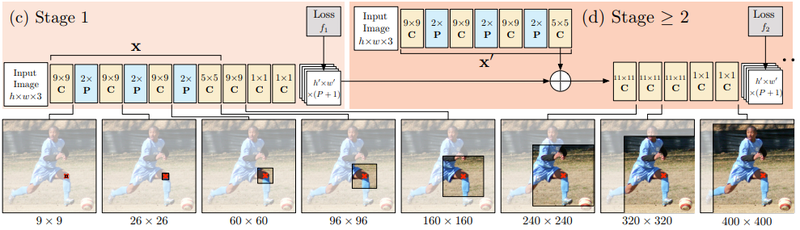

- Stage 1구조는 고정

- 보통  3개 Stage 사용

- Stage 2부터 stage2구조 반복하여 추런

   - 입력: heatmap(image feature)
   
   - stage단꼐 거칠수록 keypoint refined효과


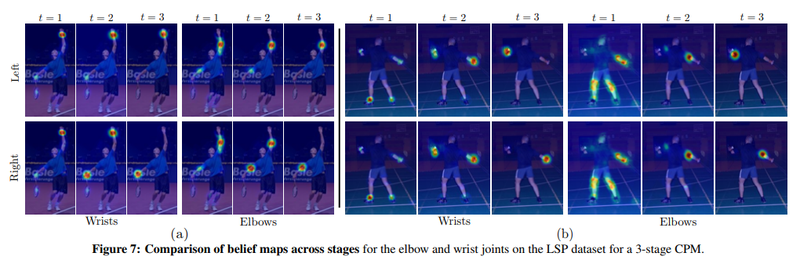


- Multi stage refinement

   - 성능 개선
   
   - receptive field넓게 만든다.
   

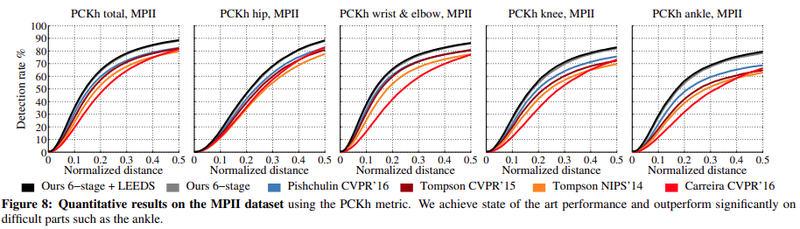

- 주황색 실선: Tompson알고리즘

- 검정색, 회색 실선: detection rate에서 유의미한 차이



<br>

*단점

Multi-stage방법을 사용하기에 end to end학습이 가능하더라고 그대로 학습했을 때 높은 성능을 가질 순 없습니다.

<br>

*해결책

stage단위로 pretraining 후 다시 하나의 모델로 합쳐서 학습을 합니다.

<br>

#### Stacked Hourglass Network

- ECCV16논문


**Hourglass**

- Stacked Hourglass Network기본구조

   - Conv layer와 pooling로  이미지 인코딩
   
   - upsampling layer를 통해 feature map크기 키우기 디코딩
   
   - feature map크기가 작아졌다 커지는 구조
   
 
   
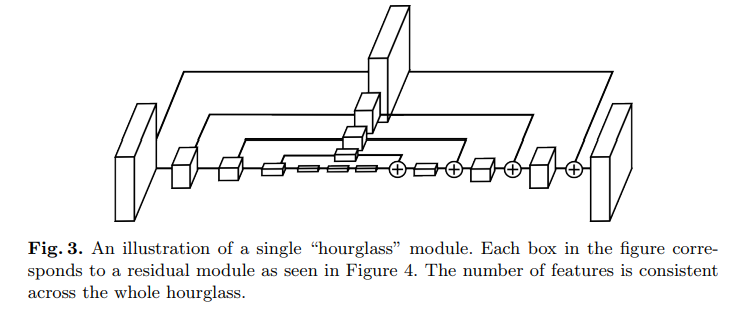


*기존 방식과 차이점*

> feature map upsampling and residual connection


- hourglass의 핵심 novelty

   - pooling으로 image의 global feature 찾기

   - upsampling로 local feature고려

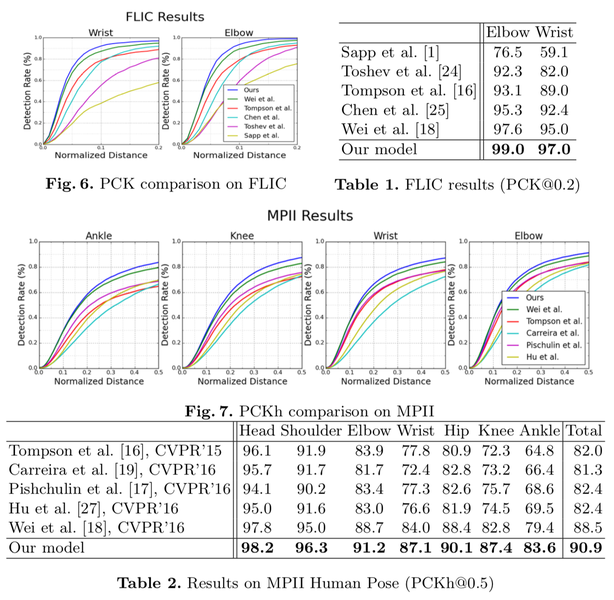


<br>

#### SimpleBaseline

아주 간단한 encoder-decoder구조 설계 및 Cascaded Pyramid Network이용

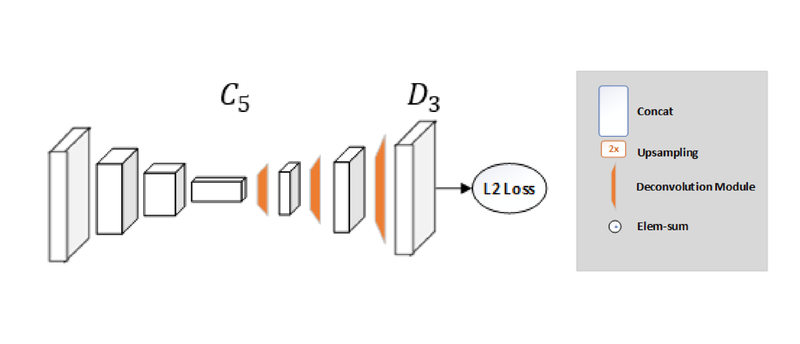

*결과

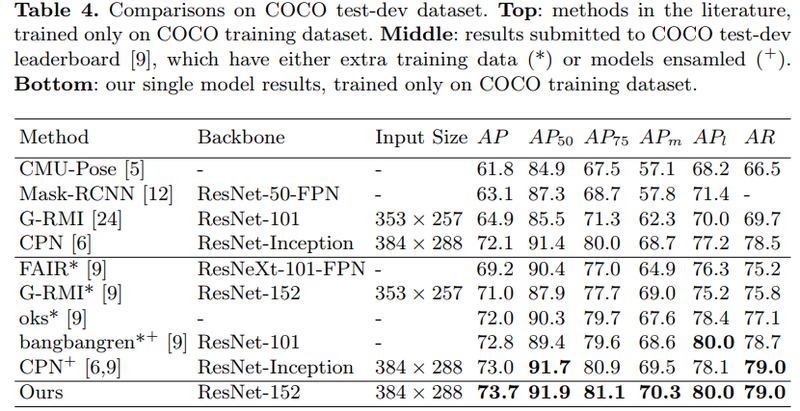


<br>

#### Deep High-Resolution Network(HRNet)


- SOTA에 가장 가까운 성능을 보이는 좋은 알고리즘

- Simplebaseline과 같은 철학 공유

- 1-stage고수(간단함을 추구)

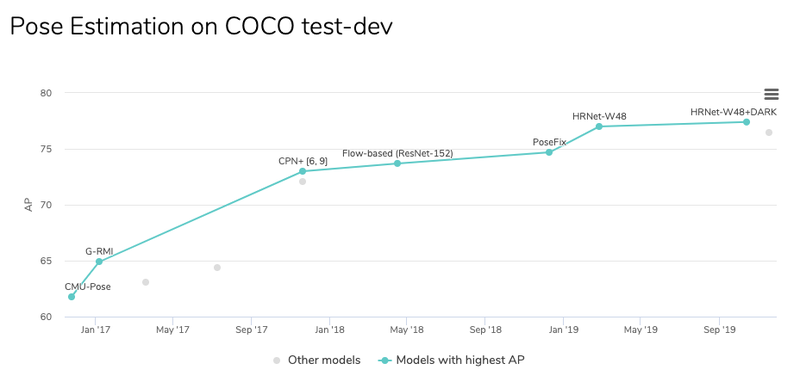


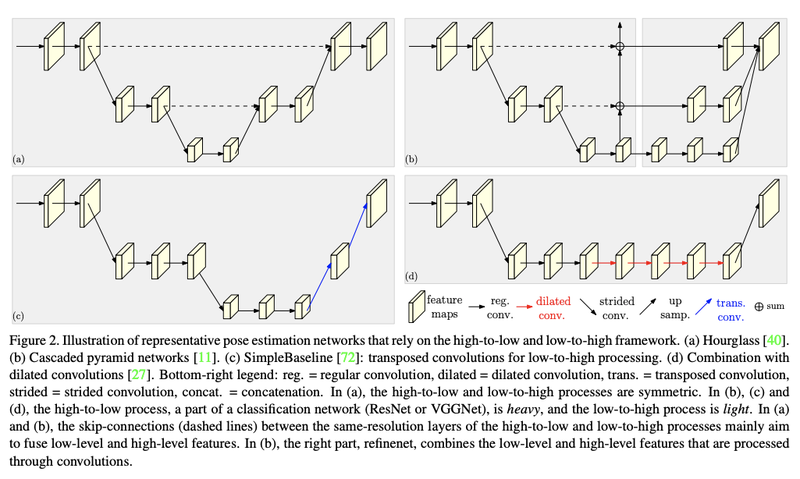

(a): Hourglass

(b): CPN(Cascaded Pyramid Networks)

(c): SimpleBaseline-transposed conv

(d): SimpleBaseline-dilated conv


**Simplebaseline 공통점과 차이점**

*공통점

> high resolution → low resolution 인 encoder 와 low → high 인 decoder 구조로 이루어진 점

<br>

*차이점
> Hpirglass는 encoder과 decoder비율이 거의 비슷함(대칭적임). 반면 Simplebaseline 은 encoder 가 무겁고 (resnet50 등 backbone 사용) decoder 는 가벼운 모델을 사용함. (a), (b) 는 skip connection 이 있지만 (c) 는 skip connection 이 없다.


<br>

**skip connection사용 이유**

>pooling(strided conv) 할 때 소실되는 정보를 high level layer에서 사용해서 detail한 정보를 학습하기 위해 사용합니다.


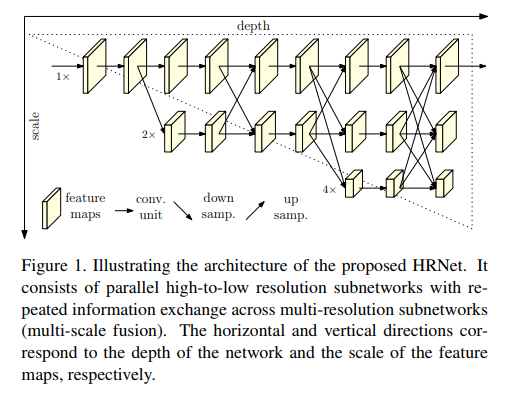

*결과

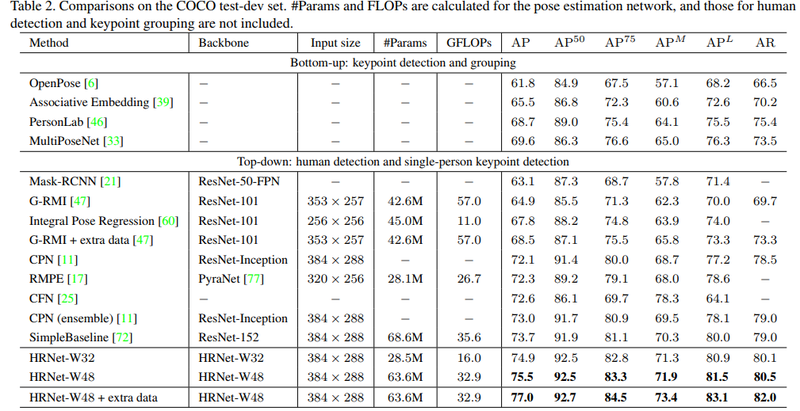